## Image Classification using Logistic Regression and SVM with Feature Engineering

1. **Load and visualize the dataset:** We preprocess grayscale images, resize them, and flatten them for model training.
2. **Train Logistic Regression on raw pixel values:** We fit a simple logistic regression model to evaluate baseline performance.
3. **Feature Engineering with HOG (Histogram of Oriented Gradients):** We extract HOG features to enhance classification performance.
4. **Train Logistic Regression on HOG features:** We compare the model’s performance before and after feature extraction.
5. **Train an SVM classifier:** We experiment with Support Vector Machines (SVM) to compare performance against Logistic Regression.

In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.metrics import confusion_matrix

### Helper functions

In [44]:
def imshow(image, title=None):
    plt.axis('off')
    plt.title(title)
    plt.imshow(image, 'gray')
    plt.show()
def showGridImage(images, labels, gsize=5,title=None):
    '''
    Function shows Multiple images.
    params: 
    images--> [Req] array of images flatten to 100*100
    labels --> [Req] array of labels (image class)
    gsize --> [opt, default=5] size for the grid gsize x gsize
    title --> [opt, default=None] title for the grid
    '''
    selected_indices = np.random.choice(len(images), size=gsize*gsize, replace=False)

    # Create a 5x5 grid for subplots
    fig, axes = plt.subplots(gsize,gsize, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        index = selected_indices[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"Image {classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

### Loading the data

In [45]:
mainPath = './dataset/'
classes = os.listdir(mainPath)

In [46]:
classes

['Cars', 'Cricket ball', 'Ice cream cone']

In [47]:
images = []
labels = []
for i in classes:
    clsPath = os.path.join(mainPath,i)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        images.append(image.flatten())
        label = classes.index(i)
        labels.append(label)

In [48]:
classes

['Cars', 'Cricket ball', 'Ice cream cone']

### Converting to numpy arrays

In [49]:
images = np.array(images)
labels = np.array(labels)

In [50]:
data = pd.DataFrame(images)
data

0     1     2     3     4     5     6     7     8     9     ...  9990  \
0     255   255   255   255   255   255   255   255   255   255  ...   255   
1     183   185   186   186   190   192   195   199   201   202  ...    83   
2      43    65    64    49    48    53    50    36    44    46  ...   145   
3     180   180   174   176   173   172   160    65    36    37  ...   113   
4     103    21    15    17    49   112   108   119    78    14  ...   144   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
982   117   116   115   117   117   117   117   116   116   117  ...    96   
983    97    96    97   100   109   123   136   147   153   161  ...   170   
984   255   255   255   255   255   255   255   255   255   255  ...   255   
985   255   255   255   255   255   255   255   255   255   255  ...   255   
986   255   255   255   255   255   255   255   255   255   255  ...   255   

     9991  9992  9993  9994  9995  9996  9997  9998  9999  
0     255   255   255   255   255   255   255   255   255  
1      83    85    85    86    86    84    85    84    83  
2     149   158   156   162   158   146   151   153   149  
3     128   127   117   114   113   108   114   116   122  
4     121   136   133   151   148   122   144   137   141  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
982    95    95    94    94    94    93    92    92    91  
983   166   163   159   155   153   152   150   150   148  
984   255   255   255   255   255   255   255   255   255  
985   255   255   255   255   255   255   255   255   255  
986   255   255   255   255   255   255   255   255   255  

[987 rows x 10000 columns]

### showing few random images from dataset

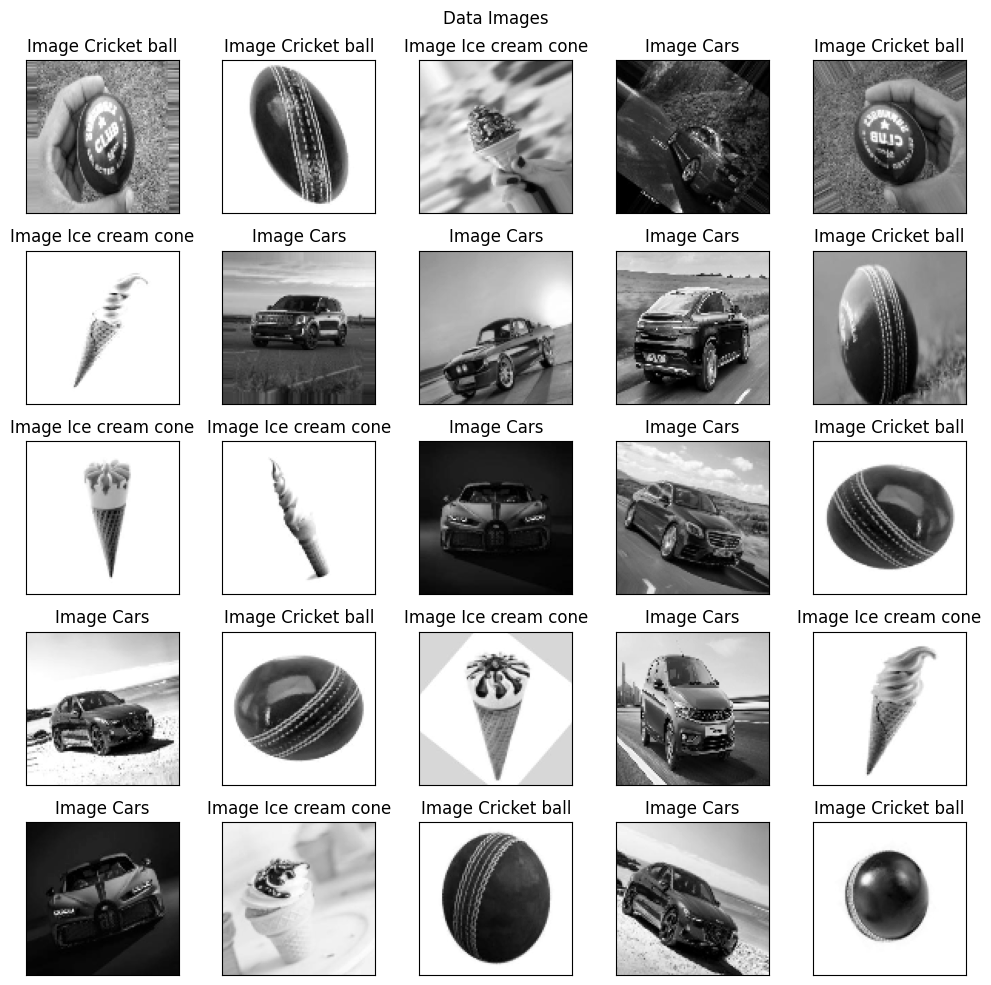

In [51]:
showGridImage(images, labels ,5, 'Data Images')

### Splitting the dataset into train and test data
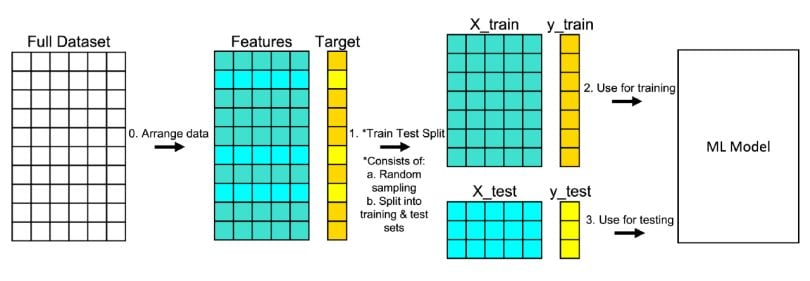

In [52]:
xTrain, xTest, yTrain, yTest = train_test_split(images, labels, test_size=0.2, random_state=0)

### Fitting the ML Model (Logistic Regression)
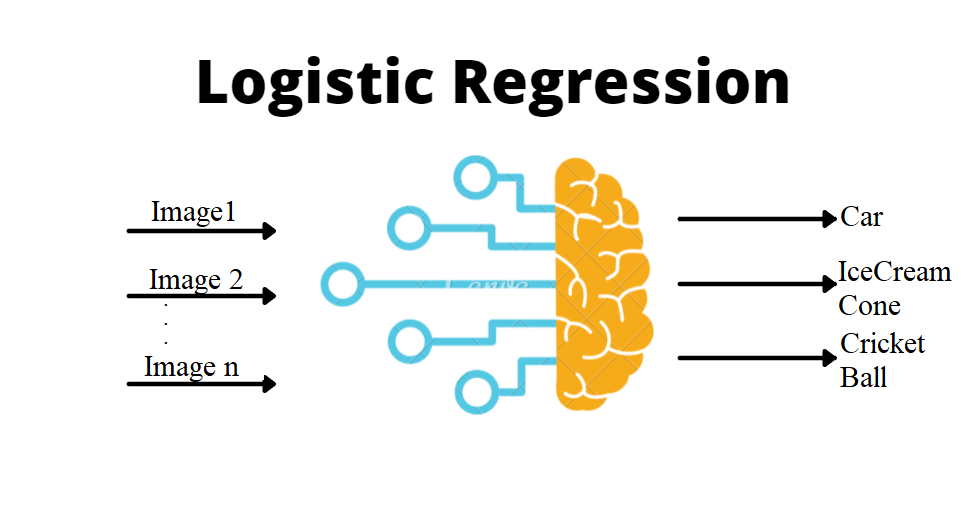

In [53]:
logisticReg = LogisticRegression(max_iter=1000)
logisticReg.fit(xTrain, yTrain)

LogisticRegression(max_iter=1000)

### Prediction on Test Data

In [54]:
predsClasses = logisticReg.predict(xTest)

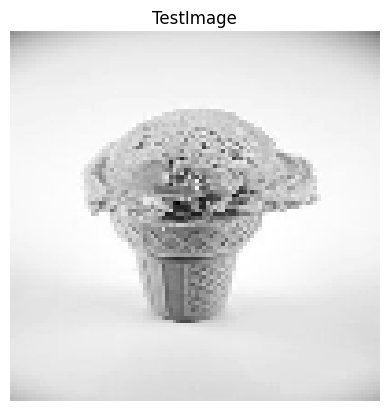

In [55]:
imshow(xTest[0].reshape(100,100), 'TestImage')
ModelPrediction = logisticReg.predict([xTest[0]])

In [56]:
classes[ModelPrediction[0]]

'Ice cream cone'

### Evaluating the model
    1. Train Accuracy
    2. Test Accuracy

In [57]:
trainAccuracy = logisticReg.score(xTrain, yTrain)
testAccuracy = logisticReg.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 100.00%
Test Accuracy: 79.29%


### Confusion Matrix
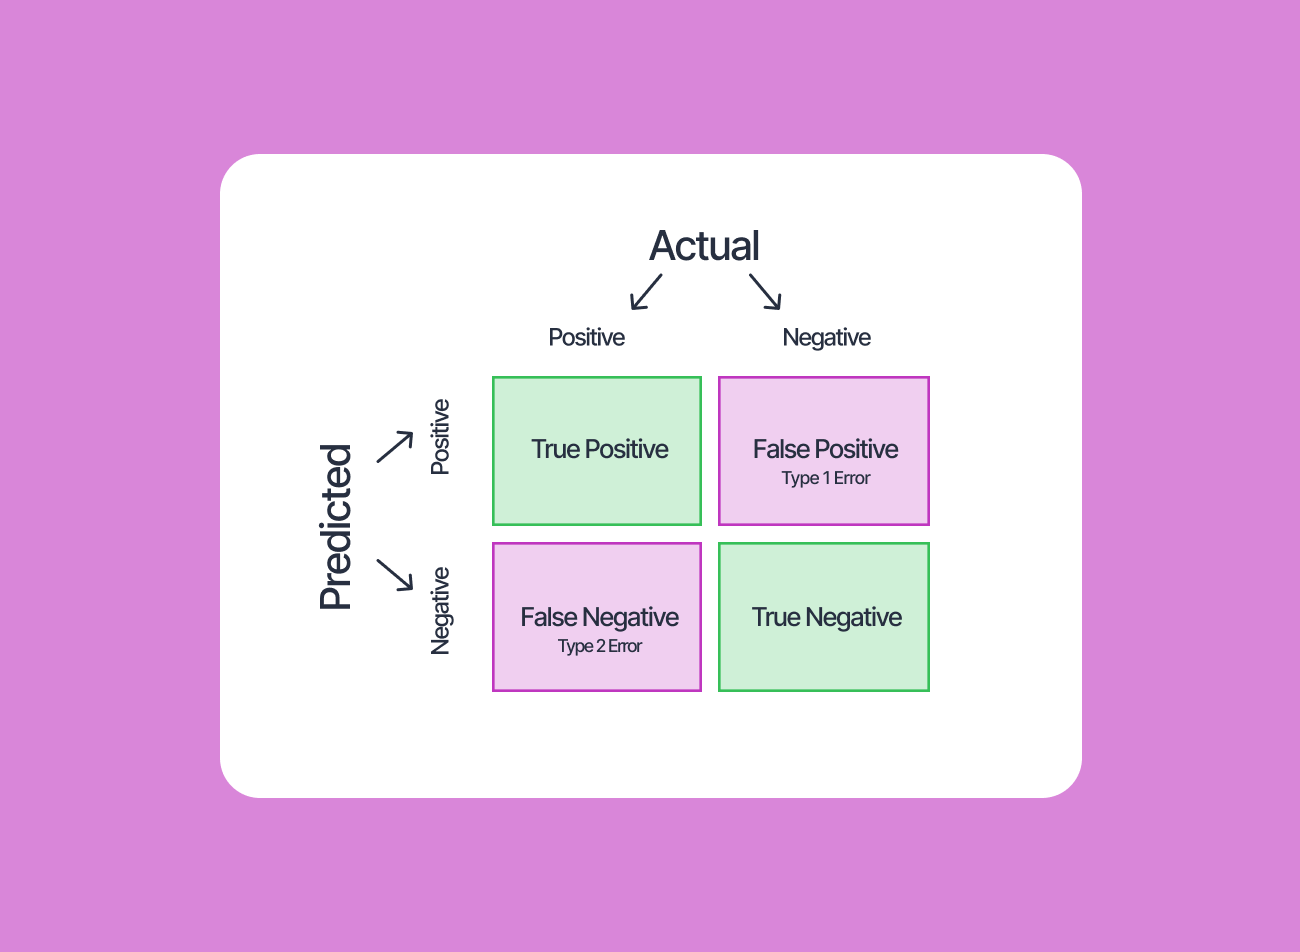

<Axes: >

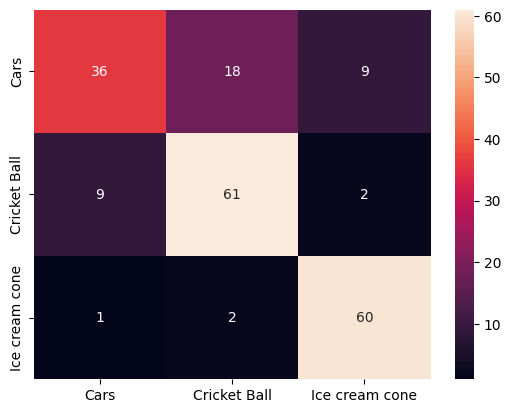

In [58]:
class_names = ['Cars', 'Cricket Ball', 'Ice cream cone']
cmLogistic = confusion_matrix(yTest, predsClasses)
sns.heatmap(cmLogistic, annot=True, xticklabels=class_names, yticklabels=class_names, fmt='d')

### Showing images with model predicted Class 

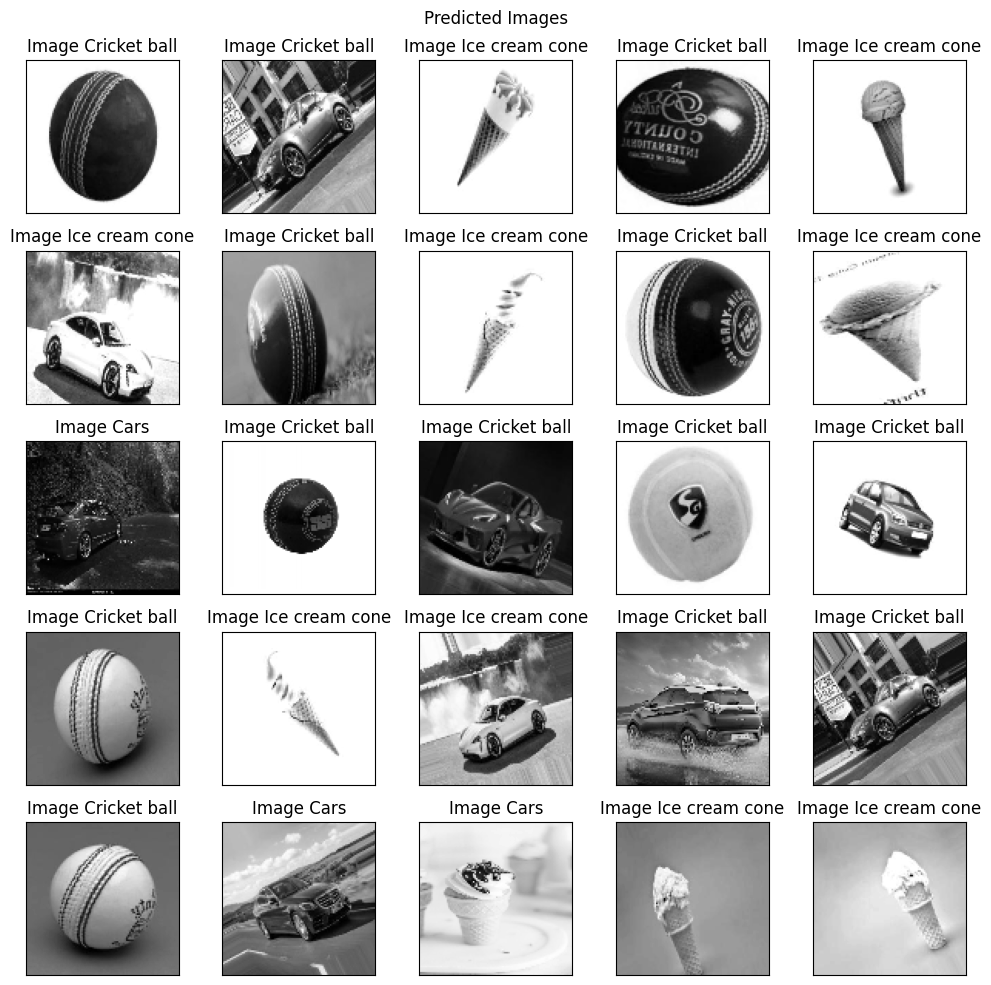

In [59]:
showGridImage(xTest, predsClasses, 5, 'Predicted Images')

---

### Using the hog feature descriptor for feature extraction

### Hog Features Descriptor
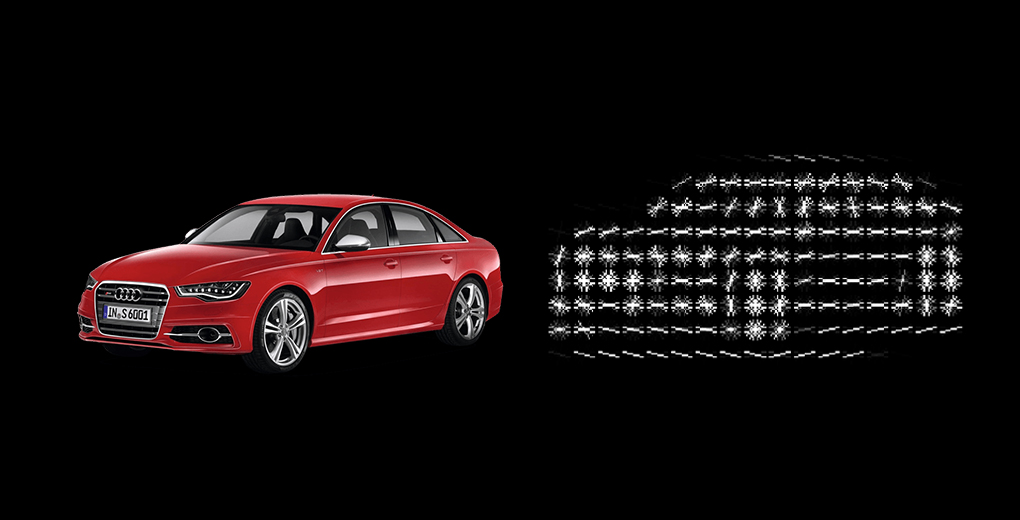
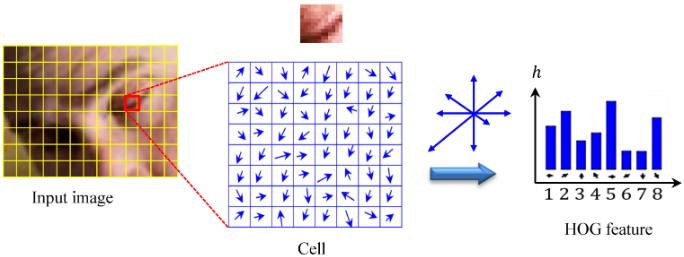

In [60]:
mainPath = './dataset/'
classes = os.listdir(mainPath)
hogImages = []
hogFeatures = []
labels = []
for i in classes:
    clsPath = os.path.join(mainPath,i)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        features, hogImage = hog(image, visualize=True)
        hogImages.append(hogImage)
        hogFeatures.append(features)
        label = classes.index(i)
        labels.append(label)

In [61]:
hogFeatures = np.array(hogFeatures)
labels = np.array(labels)
hogImages = np.array(hogImages)

### Visualizing HOG images

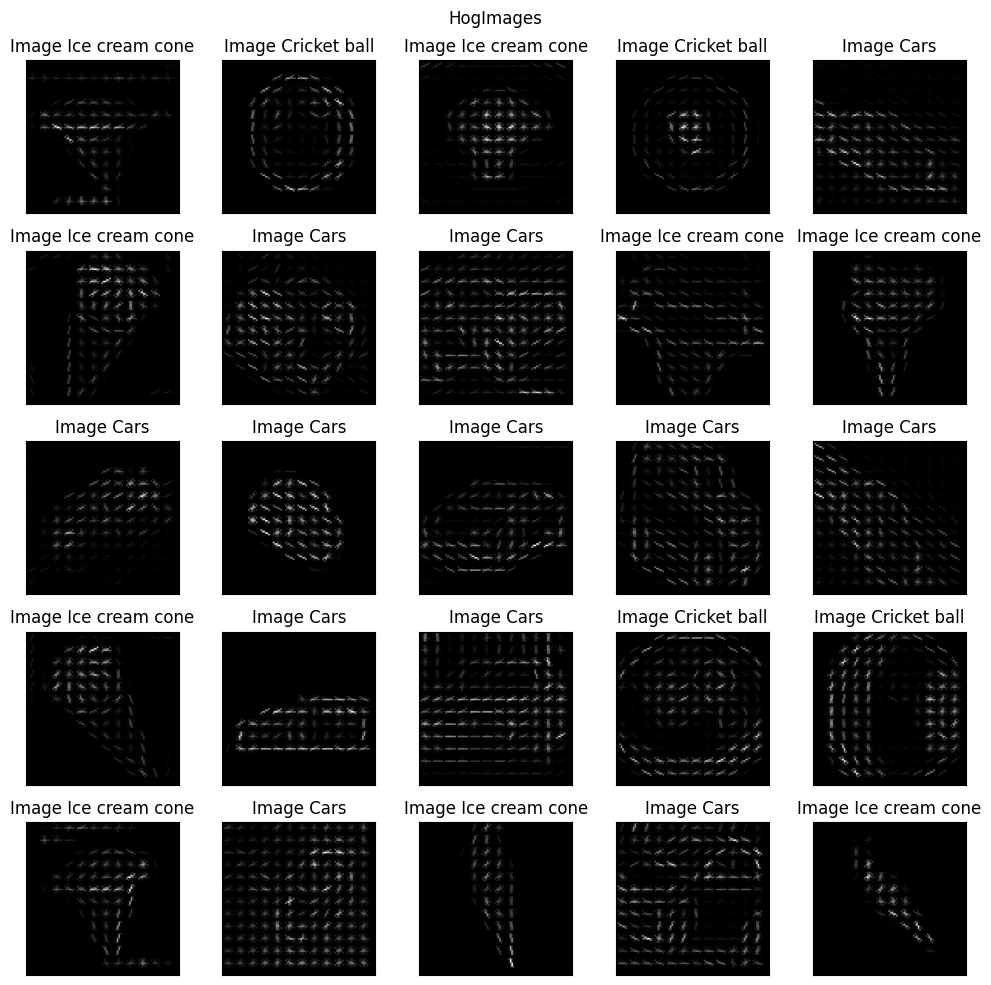

In [62]:
showGridImage(hogImages, labels, title='HogImages')

In [63]:
xTrain, xTest, yTrain, yTest = train_test_split(hogFeatures, labels, test_size=0.2, random_state=42)
hogTrainImages, hogTestImages, hogTrainLabels, hogTestLabels = train_test_split(hogImages, labels, test_size=0.2, random_state=42)

### Fitting Logistic Regression on HOG features

In [64]:
logisticReg = LogisticRegression(max_iter=1000)
logisticReg.fit(xTrain, yTrain)

LogisticRegression(max_iter=1000)

In [65]:
predsClasses = logisticReg.predict(xTest)

In [66]:
trainAccuracy = logisticReg.score(xTrain, yTrain)
testAccuracy = logisticReg.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 100.00%
Test Accuracy: 95.96%


### Showing predictions

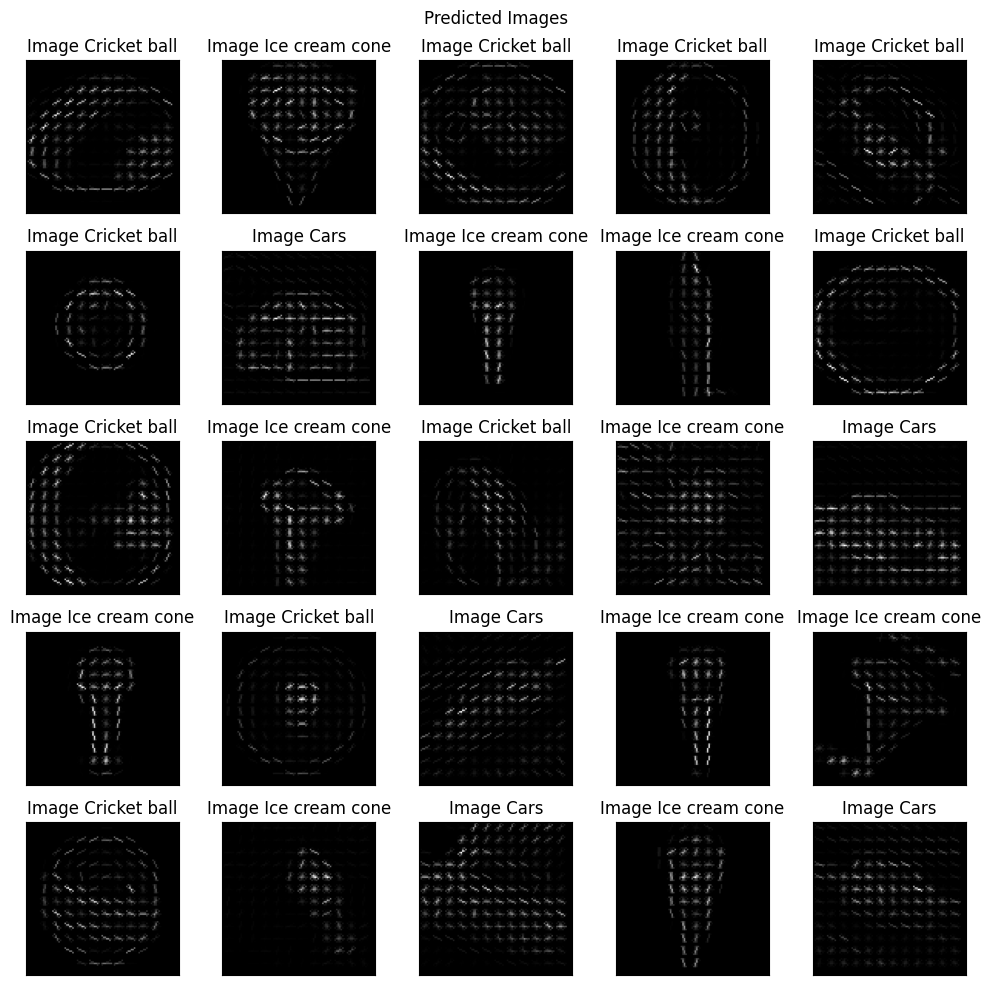

In [67]:
showGridImage(hogTestImages, predsClasses, 5,'Predicted Images')

<Axes: >

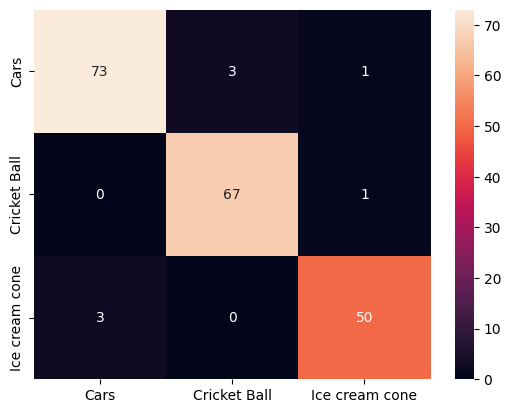

In [68]:
class_names = ['Cars', 'Cricket Ball', 'Ice cream cone']
cmLogistic_hog = confusion_matrix(yTest, predsClasses)
sns.heatmap(cmLogistic_hog, annot=True, xticklabels=class_names, yticklabels=class_names, fmt='d')

---

## Support Vector Machine

In [69]:
mainPath = './dataset/'
classes = os.listdir(mainPath)
images = []
labels = []
for i in classes:
    clsPath = os.path.join(mainPath,i)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        images.append(image.flatten())
        label = classes.index(i)
        labels.append(label)

In [70]:
images = np.array(images)
labels = np.array(labels)

In [71]:
xTrain, xTest, yTrain, yTest = train_test_split(images, labels, test_size=0.2, random_state=42)

### Fitting Support Vector Classifier on images

In [72]:
SVMClassifier = SVC()
SVMClassifier.fit(xTrain, yTrain)

SVC()

In [73]:
predsClasses = SVMClassifier.predict(xTest)

In [74]:
trainAccuracy = SVMClassifier.score(xTrain, yTrain)
testAccuracy = SVMClassifier.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 97.34%
Test Accuracy: 92.93%


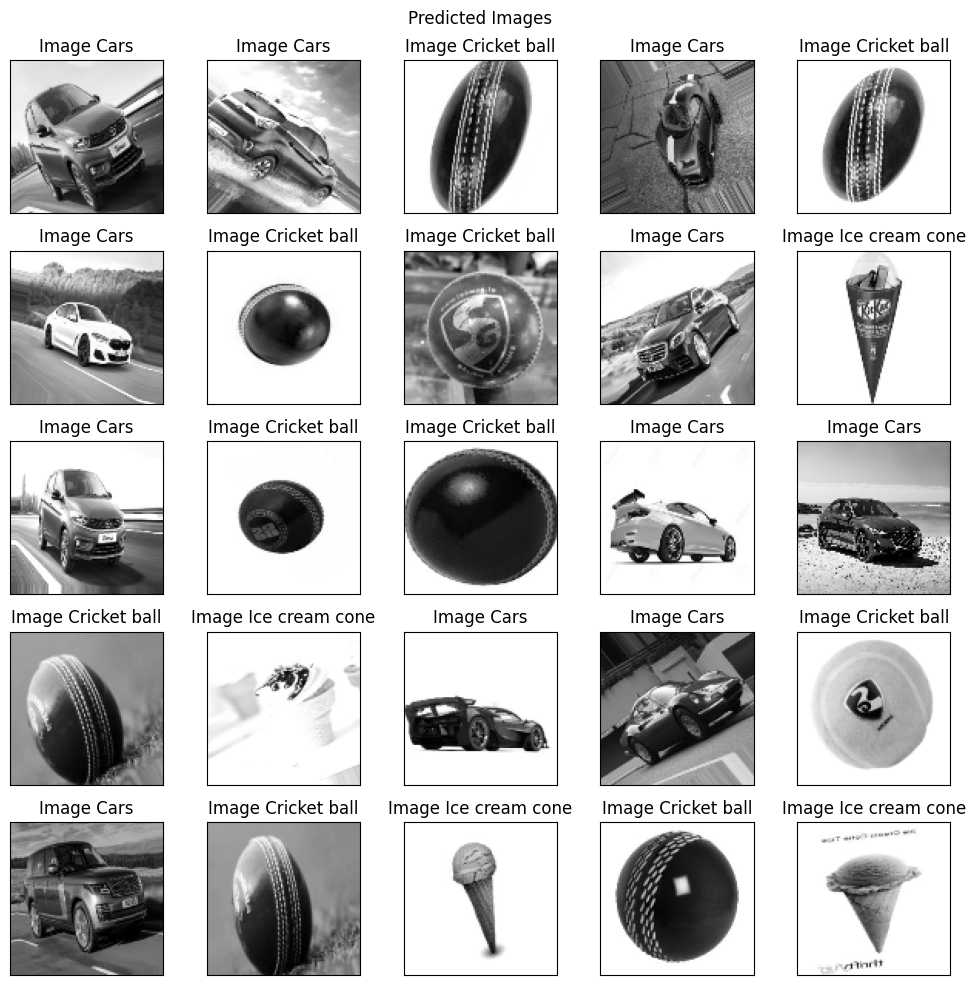

In [75]:
showGridImage(xTest, predsClasses, 5,'Predicted Images')

<Axes: >

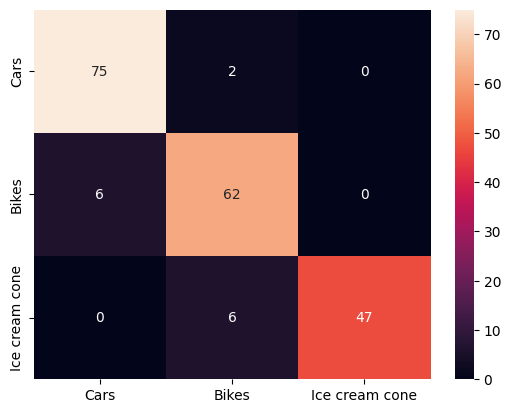

In [76]:
class_names = ['Cars', 'Bikes', 'Ice cream cone']
cmSvm = confusion_matrix(yTest, predsClasses)
sns.heatmap(cmSvm, annot=True, xticklabels=class_names, yticklabels=class_names, fmt='d')

---

In [77]:
mainPath = './dataset/'
classes = os.listdir(mainPath)
hogImages = []
hogFeatures = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        features, hogImage = hog(image, visualize=True)
        hogImages.append(hogImage)
        hogFeatures.append(features)
        label = classes.index(cls)
        labels.append(label)

In [78]:
images = np.array(images)
labels = np.array(labels)

In [79]:
xTrain, xTest, yTrain, yTest = train_test_split(hogFeatures, labels, test_size=0.2, random_state=42)
hogTrainImages, HogTestImages, hogTrainLabels, hogTestLabels = train_test_split(hogImages, labels, test_size=0.2, random_state=42)

### Fitting Support Vector Classifier on HOG features

In [80]:
SVMClassifier = SVC()
SVMClassifier.fit(xTrain, yTrain)

SVC()

In [81]:
predsClasses = SVMClassifier.predict(xTest)

In [82]:
trainAccuracy = SVMClassifier.score(xTrain, yTrain)
testAccuracy = SVMClassifier.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 99.87%
Test Accuracy: 97.47%


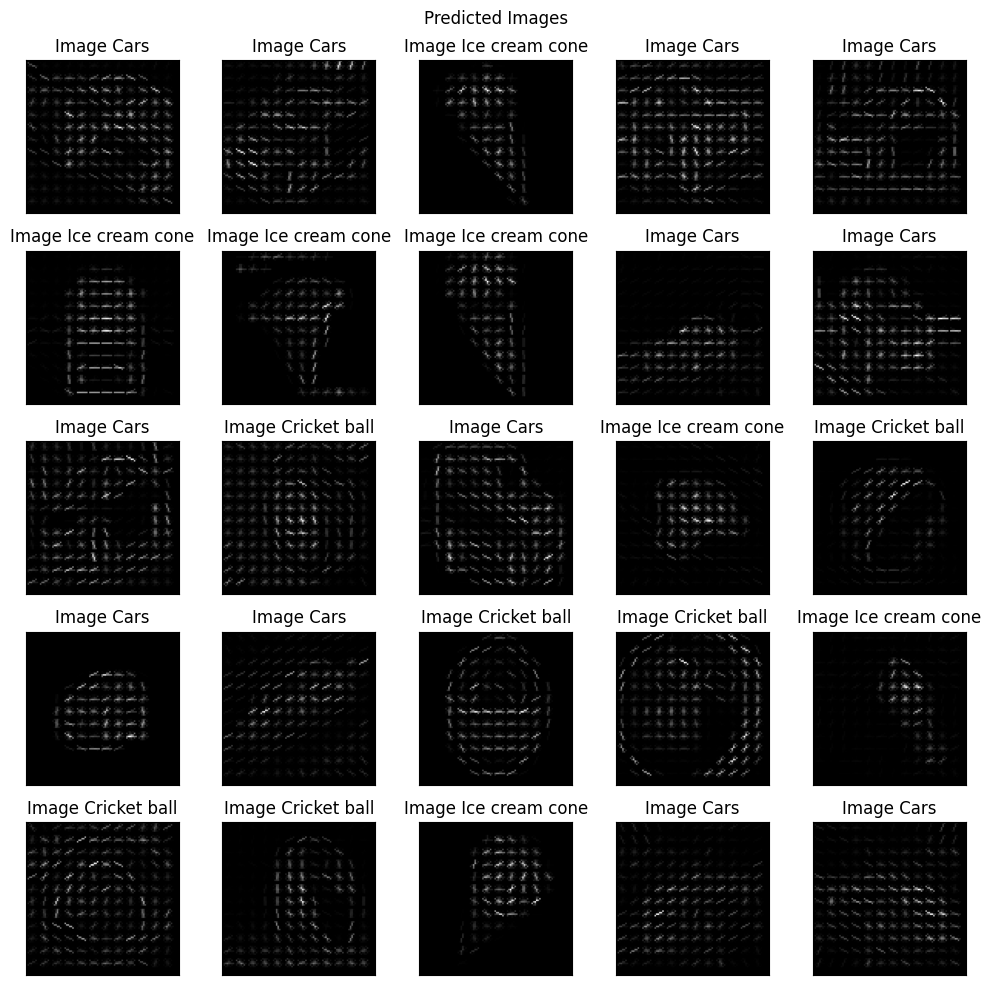

In [83]:
showGridImage(HogTestImages, predsClasses, 5,'Predicted Images')

<Axes: >

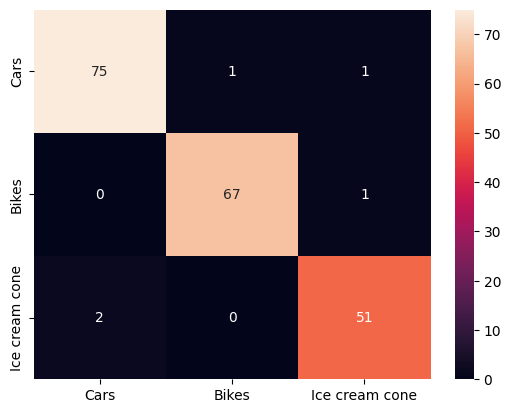

In [84]:
class_names = ['Cars', 'Bikes', 'Ice cream cone']
cmSvm_hog = confusion_matrix(yTest, predsClasses)
sns.heatmap(cmSvm_hog, annot=True, xticklabels=class_names, yticklabels=class_names, fmt='d')

---

# Model Comparison Table

| **Model**                                  | **Feature Extractor (HOG)** | **Training Accuracy (%)** | **Test Accuracy (%)** |
|--------------------------------------------|----------------------------|--------------------------|-----------------------|
| Logistic Regression (Raw Data) - Run 1    | ❌ No                      | 100.00                   | 79.80                 |
| Logistic Regression (HOG Features) - Run 1 | ✅ Yes                     | 100.00                   | 96.97                 |
| Logistic Regression (Raw Data) - Run 2    | ❌ No                      | 97.34                    | 92.93                 |
| Logistic Regression (HOG Features) - Run 2 | ✅ Yes                     | 99.87                    | 97.47                 |

## **Observations:**
1. **Feature extraction using HOG significantly improves test accuracy.**  
   - Without HOG, test accuracy is lower (79.80% and 92.93%) compared to models with HOG (96.97% and 97.47%).  
   
2. **Raw data models tend to overfit.**  
   - Models without HOG achieve 100% and 97.34% training accuracy but struggle with generalization.  


## Save the best model

In [85]:
import joblib

best_model = SVMClassifier
best_model_path = "best_model.pkl"
joblib.dump(best_model, best_model_path)

['best_model.pkl']

---